Name :- Abhishek kushwaha 
> Task :- SALES PREDICTION USING PYTHON

>*Aim:- Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.*

*IMPORTING IMPORTANT LIBRARIES*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*IMPORTING DATASET*

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

***Data Pre-Processing***

In [4]:
# it will dispaly all null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# check for duplicate values in ProductID column
duplicate_values = df['TV'].duplicated()
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197     True
198    False
199    False
Name: TV, Length: 200, dtype: bool


In [6]:
# check for duplicate values in ProductID column
duplicate_values = df['Radio'].duplicated()
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196     True
197     True
198     True
199    False
Name: Radio, Length: 200, dtype: bool


In [7]:
# check for duplicate values in ProductID column
duplicate_values = df['Newspaper'].duplicated()
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197     True
198    False
199     True
Name: Newspaper, Length: 200, dtype: bool


In [8]:
# check for duplicate values in ProductID column
duplicate_values = df['Sales'].duplicated()
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
195     True
196     True
197    False
198    False
199     True
Name: Sales, Length: 200, dtype: bool


There is no duplicated value so no need for data cleaning .

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000



**Basic Observation**

---
> Avg expense spend is highest on TV


> Avg expense spend is lowest on Radio


> Max sale is 27 and min is 1.6







In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


***Data Analysis with visualization***

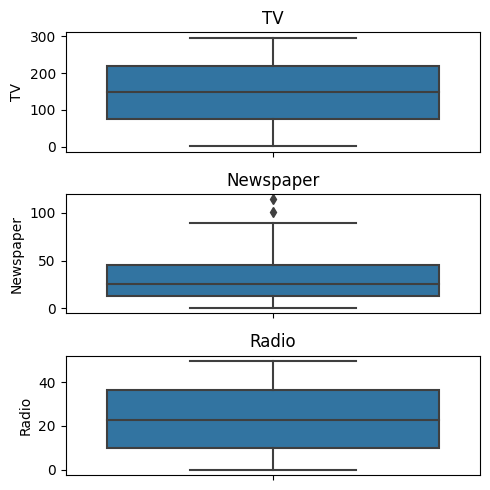

In [11]:
fig, axs = plt.subplots(3, figsize=(5, 5))

# Create box plots
plt1 = sns.boxplot(y=df["TV"], ax=axs[0])
plt2 = sns.boxplot(y=df["Newspaper"], ax=axs[1])
plt3 = sns.boxplot(y=df["Radio"], ax=axs[2])

# Set titles for each box plot
axs[0].set_title("TV")
axs[1].set_title("Newspaper")
axs[2].set_title("Radio")

plt.tight_layout()
plt.show()

Basic Observation
> News paper has an outliers 

C:\Users\hp\AppData\Local\Temp\ipykernel_2596\3077622747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newspaper"])


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

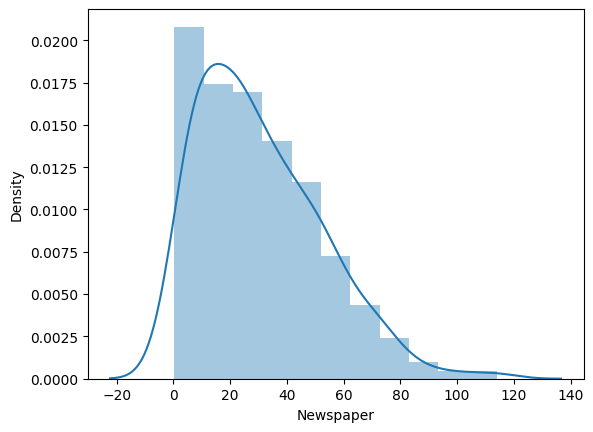

In [12]:
sns.distplot(df["Newspaper"])

In [13]:
# Inter quantile range for Newspaper
iqr=df.Newspaper.quantile(0.75)- df.Newspaper.quantile(0.25)

In [14]:
# Lower outlier and higher outlier
lower=df["Newspaper"].quantile(0.25)-(iqr*1.5)
higher=df["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower)
print(higher)

-35.775000000000006
93.625


In [15]:
# copy the data for removing outlier
data=df.copy()

In [16]:
data.loc[data["Newspaper"]>=93,"Newspaper"]=93

<AxesSubplot:>

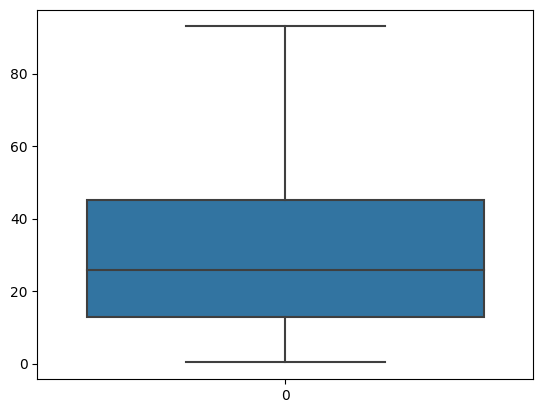

In [17]:
sns.boxplot(data["Newspaper"])

**Now we can see that there is no outliers **

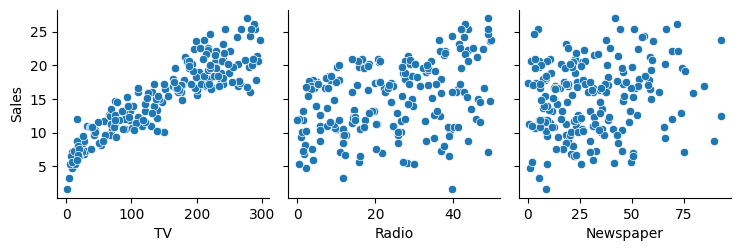

In [18]:
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()


Pair Plot Observation


---
When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.


**Heatmap**

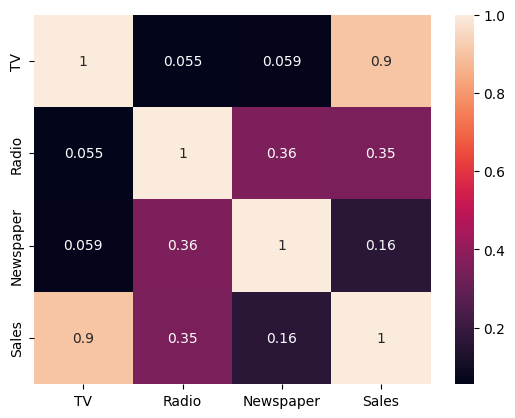

In [19]:
sns.heatmap(data.corr(),annot = True)
plt.show()

**SALES IS HIGHLY COORELATED WITH THE TV**

In [20]:
# checking for important feature
important_feature=list(df.corr()["Sales"][(df.corr()["Sales"]>0.5)|(df.corr()["Sales"]<-0.5)].index)

In [21]:
print(important_feature)

['TV', 'Sales']


Lets train our model using linear regression as it is coorelated with only one variable TV

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.2,random_state=0)

In [23]:
print(X_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [24]:
print(y_train)

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]


In [25]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0


In [26]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
res= model.predict(X_test)
print(res)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


In [29]:
model.coef_

array([[0.0544343]])

In [30]:
model.intercept_

array([7.16227597])

In [31]:
# Linear model y=ax+b
y=0.05473199* 69.2 + 7.14382225
print(y)

10.931275958


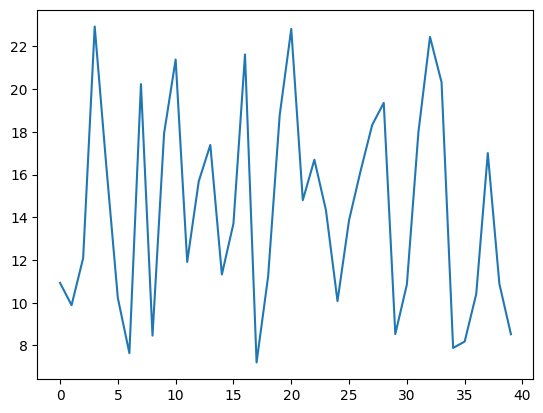

In [32]:
# Plot for linear model using x_test data
plt.plot(res)

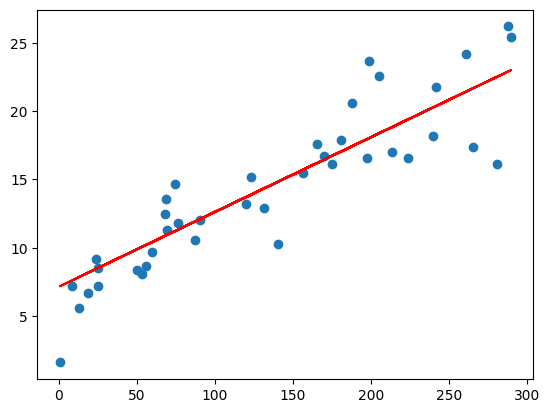

In [33]:
# Scatter plot for model
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
plt.show()